# Strategy analysis example

Debugging a strategy can be time-consuming. FreqTrade offers helper functions to visualize raw data.

## Setup

In [1]:
%matplotlib inline
import os
from pathlib import Path
# Change directory
# Modify this cell to insure that the output shows the correct path.
# Define all paths relative to the project root shown in the cell output
project_root = "/home/cryo/freqtrade"
i=0
try:
    os.chdirdir(project_root)
    assert Path('LICENSE').is_file()
except:
    while i<4 and (not Path('LICENSE').is_file()):
        os.chdir(Path(Path.cwd(), '../'))
        i+=1
    project_root = Path.cwd()
print(Path.cwd())

# Customize these according to your needs.

# Define some constants
timeframe = "5m"
# Name of the strategy class
strategy_name = 'MLStrategy'
# Path to user data
user_data_dir = Path('user_data')
# Location of the strategy
strategy_location = user_data_dir / 'strategies'
# Location of the data
data_location = Path(user_data_dir, 'data', 'binance')
# Pair to analyze - Only use one pair here
pair = "BTC_USDT"

/home/cryo/freqtrade


In [2]:
# Load data using values set above
from freqtrade.data.history import load_pair_history

candles = load_pair_history(datadir=data_location,
                            timeframe=timeframe,
                            pair=pair)

# Confirm success
print("Loaded " + str(len(candles)) + f" rows of data for {pair} from {data_location}")
candles.head()

Loaded 8639 rows of data for BTC_USDT from user_data/data/binance


date     open     high      low    close     volume
0 2019-10-15 21:55:00+00:00  8146.95  8159.00  8144.49  8157.99  76.948556
1 2019-10-15 22:00:00+00:00  8157.99  8158.19  8150.08  8156.38  44.493666
2 2019-10-15 22:05:00+00:00  8155.70  8157.57  8150.26  8150.93  43.126204
3 2019-10-15 22:10:00+00:00  8150.96  8157.00  8150.08  8155.20  36.664101
4 2019-10-15 22:15:00+00:00  8155.08  8157.91  8151.22  8157.46  50.256138

## Load and run strategy
* Rerun each time the strategy file is changed

### Display the trade details

* Note that using `data.head()` would also work, however most indicators have some "startup" data at the top of the dataframe.
* Some possible problems
    * Columns with NaN values at the end of the dataframe
    * Columns used in `crossed*()` functions with completely different units
* Comparison with full backtest
    * having 200 buy signals as output for one pair from `analyze_ticker()` does not necessarily mean that 200 trades will be made during backtesting.
    * Assuming you use only one condition such as, `df['rsi'] < 30` as buy condition, this will generate multiple "buy" signals for each pair in sequence (until rsi returns > 29). The bot will only buy on the first of these signals (and also only if a trade-slot ("max_open_trades") is still available), or on one of the middle signals, as soon as a "slot" becomes available.  


In [10]:
# Load strategy using values set above
from freqtrade.resolvers import ExchangeResolver, StrategyResolver
from freqtrade.configuration import Configuration
from freqtrade.state import RunMode
from freqtrade.data.dataprovider import DataProvider
from freqtrade.strategy.interface import IStrategy

config = Configuration.from_files(["config.json"])
exchange = ExchangeResolver(config['exchange']['name'], config, False).exchange
dataprovider = DataProvider(config, exchange)
IStrategy.dp = dataprovider
# dataframe = dataprovider.historic_ohlcv(pair)
strategy = StrategyResolver({'strategy': strategy_name,
                            'user_data_dir': user_data_dir,
                            'strategy_path': strategy_location}).strategy

# Generate buy/sell signals using strategy
df = strategy.analyze_ticker(candles, {'pair': pair})

2019-12-01 15:20:44,540 - freqtrade.configuration.configuration - INFO - Using config: config.json ...
2019-12-01 15:20:44,548 - freqtrade.configuration.configuration - INFO - Validating configuration ...
2019-12-01 15:20:44,559 - freqtrade.loggers - INFO - Verbosity set to 0
2019-12-01 15:20:44,561 - freqtrade.configuration.configuration - INFO - Using user-data directory: /home/cryo/freqtrade/user_data ...
2019-12-01 15:20:44,563 - freqtrade.configuration.configuration - INFO - Using data directory: /home/cryo/freqtrade/user_data/data/binance ...
2019-12-01 15:20:44,566 - freqtrade.configuration.check_exchange - INFO - Checking exchange...
2019-12-01 15:20:44,567 - freqtrade.configuration.check_exchange - INFO - Exchange "binance" is officially supported by the Freqtrade development team.
2019-12-01 15:20:44,575 - freqtrade.configuration.configuration - INFO - Using pairlist from configuration.
2019-12-01 15:20:44,577 - freqtrade.exchange.exchange - INFO - Instance is running with dr

init


2019-12-01 15:20:45,216 - freqtrade.data.converter - INFO - Missing data fillup for BTC/USDT: before: 43057 - after: 43200


train:  [-0.2860313   0.15902629  0.5568622   0.51206738  0.57556561  0.27614403
  0.3002132   0.00123194  0.00883047] 0.009075801338064791
[15:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2019-12-01 15:20:47,206 - freqtrade.resolvers.iresolver - INFO - Using resolved strategy MLStrategy from '/home/cryo/freqtrade/user_data/strategies/ml_strategy.py'...
2019-12-01 15:20:47,208 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using minimal_roi: {'80': 0.02, '40': 0.03, '20': 0.04, '0': 0.05}
2019-12-01 15:20:47,209 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using ticker_interval: 5m
2019-12-01 15:20:47,210 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using stoploss: -0.9
2019-12-01 15:20:47,211 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using trailing_stop: False
2019-12-01 15:20:47,212 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using trailing_stop_positive: 0.01
2019-12-01 15:20:47,213 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using trailing_stop_positive_offset: 0.02
2019-12-01 15:20:47,214 - freqtrade.resolvers.strategy_resolver - INFO - Strategy using trailing_only_offset_is_reached: Fa

Model fitted using dataframe of length = 32370 during 2.420842170715332 seconds with testing score =  -0.15595353760724961
predict:  [-0.39860003  0.16336288  0.56355755  0.5721434   0.60043197  0.27612403
  0.32694008  0.01881201  0.09333328] 0.028033167


/home/cryo/freqtrade/user_data/strategies/ml_strategy.py:243: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/cryo/freqtrade/.env/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/cryo/freqtrade/.env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [11]:
from plotly.subplots import make_subplots
from plotly.offline import plot
import plotly.graph_objects as go

data = df.set_index('date', drop=False)


data_red = data['2019-10-15':'2019-10-16']
fig = go.Figure()
fig2 = go.Figure()
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.close, name='close'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red['macd'], name='macd'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.minus_di, name='minus_di'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red['rsi'], name='rsi'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.fastd, name='fastd'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.fastk, name='fastk'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.sar, name='sar'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red['sma'], name='sma'))
# fig2.add_trace(go.Scatter(x=data_red.date, y=data_red.TRANGE, name='TRANGE'))
fig.add_trace(go.Scatter(x=data_red.date, y=data_red.perc_change, name='change, %'))
fig.add_trace(go.Scatter(x=data_red.date, y=data_red.future_perc_change, name='future change, %'))
# print(data_red.keys())

# fig2.show()
fig.show()

## Load existing objects into a Jupyter notebook

The following cells assume that you have already generated data using the cli.  
They will allow you to drill deeper into your results, and perform analysis which otherwise would make the output very difficult to digest due to information overload.

### Load backtest results to pandas dataframe

Analyze a trades dataframe (also used below for plotting)

In [5]:
from freqtrade.data.btanalysis import load_backtest_data

# Load backtest results
trades = load_backtest_data(user_data_dir / "backtest_results/backtest-result-TunedTA.json")

# Show value-counts per pair
trades.groupby("pair")["sell_reason"].value_counts()

pair      sell_reason
BTC/USDT  sell_signal    26
          roi             1
Name: sell_reason, dtype: int64

### Load live trading results into a pandas dataframe

In case you did already some trading and want to analyze your performance

In [6]:
from freqtrade.data.btanalysis import load_trades_from_db

# Fetch trades from database
# trades = load_trades_from_db("sqlite:///tradesv3.sqlite")

# Display results
trades.groupby("pair")["sell_reason"].value_counts()

pair      sell_reason
BTC/USDT  sell_signal    26
          roi             1
Name: sell_reason, dtype: int64

## Analyze the loaded trades for trade parallelism
This can be useful to find the best `max_open_trades` parameter, when used with backtesting in conjunction with `--disable-max-market-positions`.

`analyze_trade_parallelism()` returns a timeseries dataframe with an "open_trades" column, specifying the number of open trades for each candle.

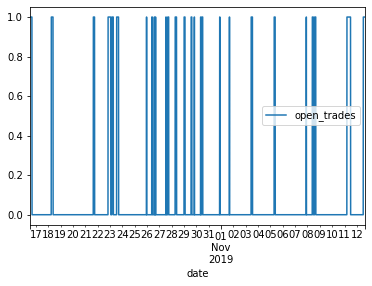

In [7]:
from freqtrade.data.btanalysis import analyze_trade_parallelism

# Analyze the above
parallel_trades = analyze_trade_parallelism(trades, '5m')


parallel_trades.plot()

## Plot results

Freqtrade offers interactive plotting capabilities based on plotly.

In [8]:
from freqtrade.plot.plotting import  generate_candlestick_graph
# Limit graph period to keep plotly quick and reactive

data_red = data['2019-10-15':'2019-11-14']
# print(data_red.head())
# Generate candlestick graph
graph = generate_candlestick_graph(pair=pair,
                                   data=data_red,
                                   trades=trades,
                                   indicators1=['close', 'future_close'],
                                   indicators2=['rsi']
                                  )




2019-12-01 15:20:13,062 - freqtrade.plot.plotting - WARNING - No sell-signals found.
2019-12-01 15:20:13,572 - freqtrade.plot.plotting - INFO - Indicator "future_close" ignored. Reason: This indicator is not found in your strategy.


In [9]:
# Show graph inline
graph.show()

# Render graph in a seperate window
# graph.show(renderer="browser")


Feel free to submit an issue or Pull Request enhancing this document if you would like to share ideas on how to best analyze the data.